In [2]:
# načtení potřebných modulů a zdrojové tabulky
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import shapiro

data = pd.read_csv("data_k_testu.csv", sep = ",")
print(data)

    ROK_JPZ             KRAJ ID_KRAJ   ROK  SUM_NAROZENI  SUM_KONALI
0      2017            Praha   CZ010  2017          9690       28025
1      2017      Středočeský   CZ020  2017         10483       12924
2      2017        Jihočeský   CZ031  2017          5733        8458
3      2017         Plzeňský   CZ032  2017          4886        7251
4      2017      Karlovarský   CZ041  2017          2949        3426
..      ...              ...     ...   ...           ...         ...
79     2022  Moravskoslezský   CZ080  2022         13373       17848
80     2023            Praha   CZ010  2023         14339       42619
81     2023        Liberecký   CZ051  2023          5220        6655
82     2023       Pardubický   CZ053  2023          5752        9325
83     2023        Jihočeský   CZ031  2023          7155       11503

[84 rows x 6 columns]


•	Nulová hypotéza H0: Narozeni v našem souboru mají normální rozdělení.
•	Alternativní hypotéza H1: Narozeni v našem souboru nemají normální rozdělení.

-> všechny kraje kromě Pardubického mají normální rozdělení (pvalue > 0.05 -> nezamítáme H0)

In [3]:
# Shapiro test pro jednotlivé kraje
df=pd.DataFrame(data)
for kraj in df['KRAJ'].unique():
    vybrane_kraje=df[df['KRAJ'].str.contains(kraj)]  
    res = stats.shapiro((vybrane_kraje)["SUM_NAROZENI"])
    print(kraj,res)    

Praha ShapiroResult(statistic=0.9521610140800476, pvalue=0.7577421069145203)
Středočeský ShapiroResult(statistic=0.8768720626831055, pvalue=0.2549985647201538)
Jihočeský ShapiroResult(statistic=0.8381620645523071, pvalue=0.1258642077445984)
Plzeňský ShapiroResult(statistic=0.8611644506454468, pvalue=0.19319689273834229)
Karlovarský ShapiroResult(statistic=0.7942489385604858, pvalue=0.05214010924100876)
Ústecký ShapiroResult(statistic=0.8704385161399841, pvalue=0.22795870900154114)
Liberecký ShapiroResult(statistic=0.8277735710144043, pvalue=0.10290996730327606)
Královéhradecký ShapiroResult(statistic=0.8608976602554321, pvalue=0.1922670304775238)
Pardubický ShapiroResult(statistic=0.7848835587501526, pvalue=0.042786840349435806)
Kraj Vysočina ShapiroResult(statistic=0.8650499582290649, pvalue=0.20717644691467285)
Jihomoravský ShapiroResult(statistic=0.8997782468795776, pvalue=0.37262099981307983)
Zlínský ShapiroResult(statistic=0.8540896773338318, pvalue=0.16979257762432098)
Moravskosl

<Axes: xlabel='SUM_NAROZENI', ylabel='SUM_KONALI'>

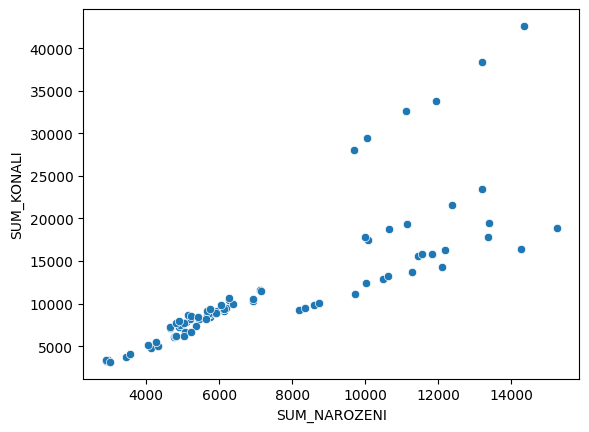

In [4]:
sns.scatterplot(data=data, x="SUM_NAROZENI", y="SUM_KONALI")

In [5]:
# korelační matice, hodnota blízká 1 -> silná přímá lineární závislost
data_korelace = data[["SUM_NAROZENI", "SUM_KONALI"]]
print(data_korelace.corr())

              SUM_NAROZENI  SUM_KONALI
SUM_NAROZENI      1.000000    0.809596
SUM_KONALI        0.809596    1.000000


In [6]:
# Test statistické významnosti: Pearson test, p-value < 0.05 -> zamítáme HO, platí H1
result = stats.pearsonr(data["SUM_NAROZENI"], data["SUM_KONALI"])
result

PearsonRResult(statistic=0.8095959399783734, pvalue=1.1490359784270138e-20)